In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
print("usatzdaten_gekuerzt.csv")
print("umsatz shape:", umsatz.shape)
print(umsatz.head(), "\n")

kiwo = pd.read_csv("kiwo.csv")
print("kiwo.csv")
print("kiwo shape:", kiwo.shape)
print(kiwo.head(), "\n")
print("kiwo shape:", kiwo.shape)
print(kiwo.head(), "\n")

wetter = pd.read_csv("wetter.csv")
print("wetter.csv") 
print("wetter shape:", wetter.shape)
print(wetter.head(), "\n")

print("Checking column names for merge alignment...")
print("umsatz columns:", umsatz.columns.tolist())
print("kiwo columns:", kiwo.columns.tolist())
print("wetter columns:", wetter.columns.tolist(), "\n")

usatzdaten_gekuerzt.csv
umsatz shape: (9334, 4)
        id       Datum  Warengruppe      Umsatz
0  1307011  2013-07-01            1  148.828353
1  1307021  2013-07-02            1  159.793757
2  1307031  2013-07-03            1  111.885594
3  1307041  2013-07-04            1  168.864941
4  1307051  2013-07-05            1  171.280754 

kiwo.csv
kiwo shape: (72, 2)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1 

kiwo shape: (72, 2)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1 

wetter.csv
wetter shape: (2601, 5)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375

In [2]:
print("Merging dataframes")

merged = (
    umsatz
    .merge(kiwo, on="Datum", how="left")
    .merge(wetter, on="Datum", how="left")
)

print("merged shape:", merged.shape)
print(merged.head(), "\n")


Merging dataframes
merged shape: (9334, 9)
        id       Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  \
0  1307011  2013-07-01            1  148.828353          NaN         6.0   
1  1307021  2013-07-02            1  159.793757          NaN         3.0   
2  1307031  2013-07-03            1  111.885594          NaN         7.0   
3  1307041  2013-07-04            1  168.864941          NaN         7.0   
4  1307051  2013-07-05            1  171.280754          NaN         5.0   

   Temperatur  Windgeschwindigkeit  Wettercode  
0     17.8375                 15.0        20.0  
1     17.3125                 10.0         NaN  
2     21.0750                  6.0        61.0  
3     18.8500                  7.0        20.0  
4     19.9750                 12.0         NaN   



In [3]:

print("Converting 'Datum' to datetime format")
umsatz["Datum"] = pd.to_datetime(umsatz["Datum"])
kiwo["Datum"] = pd.to_datetime(kiwo["Datum"])
wetter["Datum"] = pd.to_datetime(wetter["Datum"])


Converting 'Datum' to datetime format


In [4]:
#BASIC DESCRIPTIVE STATISTICS
print("Basic Descriptive Statistics:")
print(merged.describe(include='all'), "\n")

Basic Descriptive Statistics:
                  id       Datum  Warengruppe       Umsatz  KielerWoche  \
count   9.334000e+03        9334  9334.000000  9334.000000        223.0   
unique           NaN        1819          NaN          NaN          NaN   
top              NaN  2013-12-15          NaN          NaN          NaN   
freq             NaN           6          NaN          NaN          NaN   
mean    1.559311e+06         NaN     3.088172   206.749044          1.0   
std     1.512503e+05         NaN     1.489002   144.545189          0.0   
min     1.307011e+06         NaN     1.000000     7.051201          1.0   
25%     1.410123e+06         NaN     2.000000    96.897441          1.0   
50%     1.601102e+06         NaN     3.000000   161.900831          1.0   
75%     1.704223e+06         NaN     4.000000   280.644663          1.0   
max     1.807315e+06         NaN     6.000000  1879.461831          1.0   

         Bewoelkung   Temperatur  Windgeschwindigkeit   Wettercode  


In [5]:
#FREQUENCIES    
print("Frequency of 'Warengruppe':")
print(merged["Warengruppe"].value_counts(), "\n")

print("Frequency of 'Wettercode':")
print(merged["Wettercode"].value_counts(), "\n")


Frequency of 'Warengruppe':
Warengruppe
1    1819
2    1819
3    1819
5    1819
4    1766
6     292
Name: count, dtype: int64 

Frequency of 'Wettercode':
Wettercode
61.0    2271
21.0    1013
0.0      815
10.0     742
5.0      562
63.0     535
20.0     244
95.0     137
65.0     111
45.0      96
22.0      88
71.0      81
28.0      63
49.0      48
73.0      48
77.0      45
53.0      31
69.0      27
75.0      25
68.0      12
79.0       5
3.0        5
17.0       5
Name: count, dtype: int64 



In [7]:
#GROUPED STATISTICS
print("Average Umsatz by Warengruppe:")
print(merged.groupby("Warengruppe")["Umsatz"].mean(), "\n")

print("Average Umsatz by Weekday:")

merged["Datum"] = pd.to_datetime(merged["Datum"])

merged['Wochentag'] = merged['Datum'].dt.day_name()

print(merged.groupby("Wochentag")["Umsatz"].mean().sort_values(), "\n")
ordered_days = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]

merged["Wochentag"] = pd.Categorical(
    merged["Wochentag"],
    categories=ordered_days,
    ordered=True
)
print(merged["Wochentag"].dtype)
print(merged.groupby("Wochentag")["Umsatz"].mean(), "\n")

print("Average Umsatz by Wettercode:")
print(merged.groupby("Wettercode")["Umsatz"].mean(), "\n")

Average Umsatz by Warengruppe:
Warengruppe
1    122.142509
2    402.497911
3    163.340920
4     87.954042
5    276.795509
6     66.916635
Name: Umsatz, dtype: float64 

Average Umsatz by Weekday:
Wochentag
Wednesday    187.477523
Tuesday      187.944440
Thursday     193.232274
Monday       193.688449
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64 

category
Wochentag
Montag       NaN
Dienstag     NaN
Mittwoch     NaN
Donnerstag   NaN
Freitag      NaN
Samstag      NaN
Sonntag      NaN
Name: Umsatz, dtype: float64 

Average Umsatz by Wettercode:
Wettercode
0.0     206.544980
3.0     204.247178
5.0     216.910072
10.0    178.008948
17.0    180.828587
20.0    201.290593
21.0    214.536901
22.0    169.409706
28.0    207.520172
45.0    160.154311
49.0    169.605042
53.0    176.433923
61.0    197.814976
63.0    203.809247
65.0    223.957346
68.0    134.187555
69.0    149.905516
71.0    176.110211
73.0    151.601915
75.0    196.589532
77.0

C:\Users\Viki\AppData\Local\Temp\ipykernel_14548\1684525154.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged.groupby("Wochentag")["Umsatz"].mean(), "\n")


Correlation Matrix:


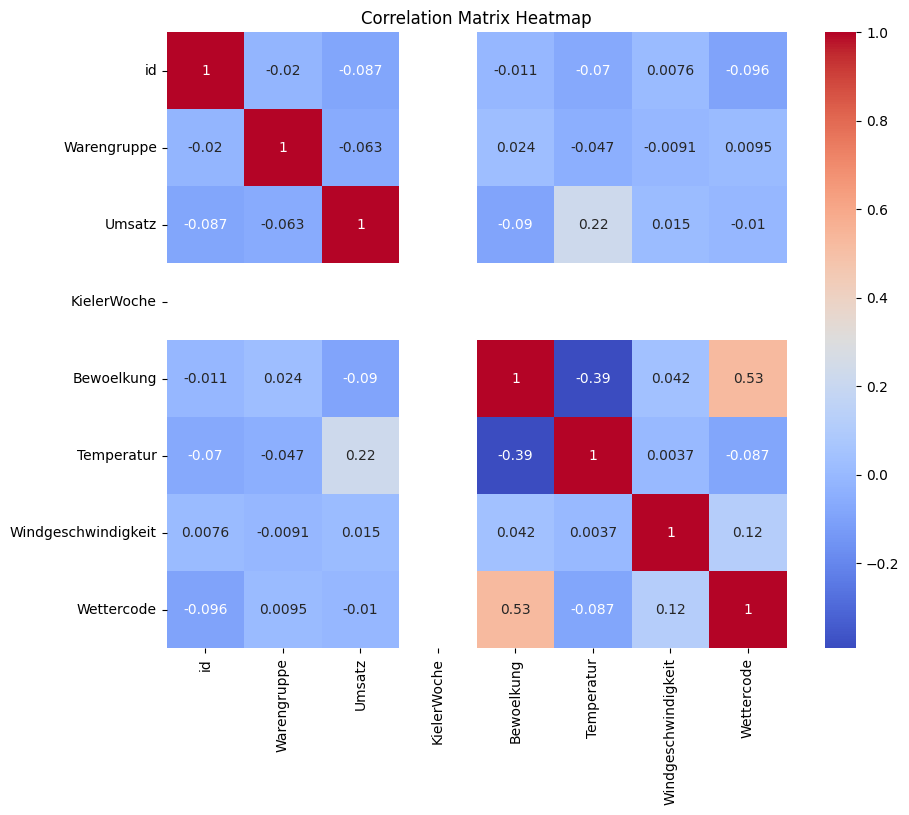

In [ ]:
#CORRELATION
print("Correlation Matrix:")
corr_matrix = (merged.corr(numeric_only=True), "\n")
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#EFFECTS OF THE KIELER WOCHE
print("Average Umsatz during Kieler Woche vs. other weeks:")
print(merged.groupby("KielerWoche")["Umsatz"].mean(), "\n")
# Zeige alle Werte und wie oft sie vorkommen (inkl. NaN)
print("Unique counts (inkl. NaN):")
print(merged["KielerWoche"].value_counts(dropna=False))
print("\ndtype:", merged["KielerWoche"].dtype)
print("Anzahl NaN in KielerWoche:", merged["KielerWoche"].isna().sum())
# Groupby nachdem NaN zu 0 gefüllt wurde (so bekommst du beide Gruppen 0 und 1)
print("Mean Umsatz, treating NaN as 0:")
print( merged.groupby( merged["KielerWoche"].fillna(0).astype(int) )["Umsatz"].mean() )

# Erstelle eine klare 0/1-Indikator-Spalte (fehlende Werte => 0)
merged["KielerWoche_flag"] = merged["KielerWoche"].fillna(0).astype(int)

# Optional: mit lesbaren Labels
label_map = {0: "Andere Woche", 1: "KielerWoche"}
merged["KielerWoche_label"] = merged["KielerWoche_flag"].map(label_map)

# Jetzt Mittelwerte berechnen
print(merged.groupby("KielerWoche_label")["Umsatz"].mean())
print("\nCounts per label:")
print(merged["KielerWoche_label"].value_counts(dropna=False))

# Mittelwerte: nur Tage mit Info (1) vs. alle anderen (inkl. NaN)
mean_kiel = merged.loc[merged["KielerWoche"] == 1, "Umsatz"].mean()
mean_other = merged.loc[merged["KielerWoche"].isna(), "Umsatz"].mean()
print("Mean Umsatz (KielerWoche==1):", mean_kiel)
print("Mean Umsatz (no KielerWoche info / NaN):", mean_other)

Average Umsatz during Kieler Woche vs. other weeks:
KielerWoche
1.0    260.559219
Name: Umsatz, dtype: float64 

Unique counts (inkl. NaN):
KielerWoche
NaN    9111
1.0     223
Name: count, dtype: int64

dtype: float64
Anzahl NaN in KielerWoche: 9111
Mean Umsatz, treating NaN as 0:
KielerWoche
0    205.431992
1    260.559219
Name: Umsatz, dtype: float64
KielerWoche_label
Andere Woche    205.431992
KielerWoche     260.559219
Name: Umsatz, dtype: float64

Counts per label:
KielerWoche_label
Andere Woche    9111
KielerWoche      223
Name: count, dtype: int64
Mean Umsatz (KielerWoche==1): 260.55921928030267
Mean Umsatz (no KielerWoche info / NaN): 205.43199157796118


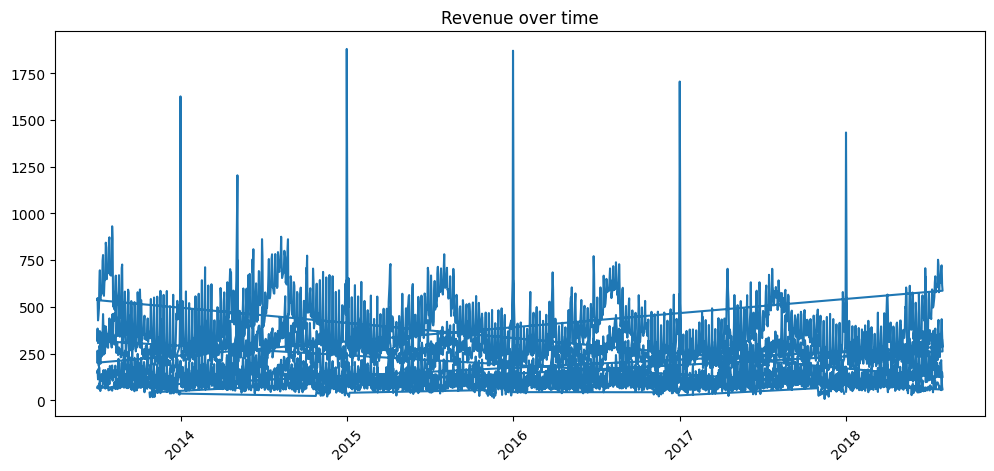

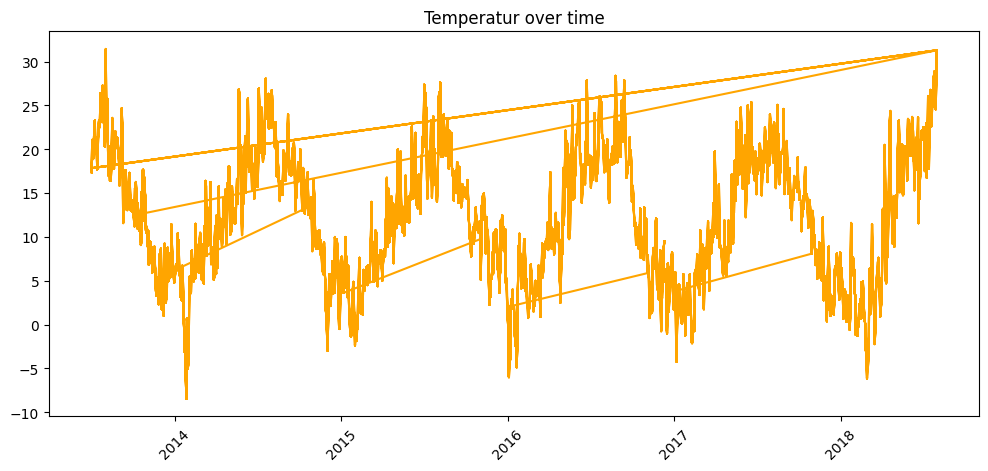

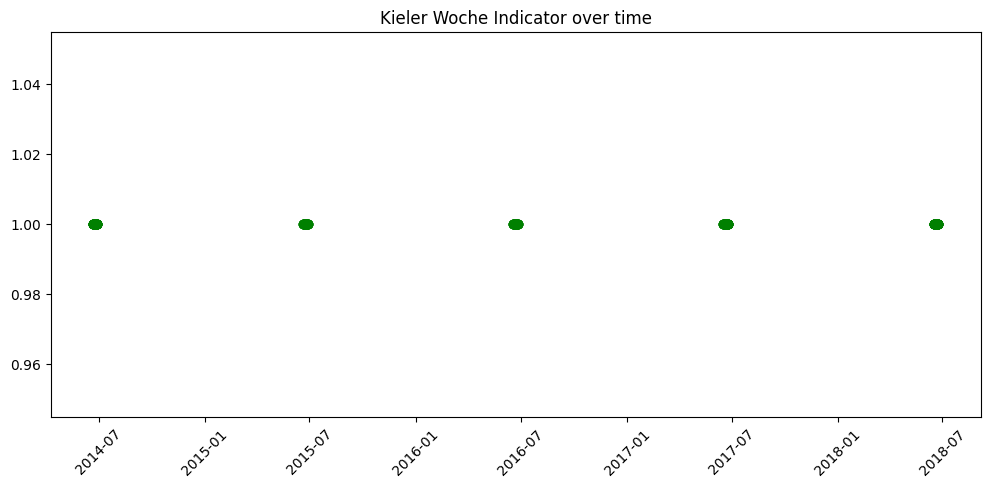

In [ ]:
#TIME SERIES ANALYSIS
#Umsatz über Zeit
plt.figure(figsize=(12,5))
plt.plot(merged["Datum"], merged["Umsatz"])
plt.xticks(rotation=45)
plt.title("Revenue over time")
plt.show()

#Temperature over time
plt.figure(figsize=(12,5))
plt.plot(merged["Datum"], merged["Temperatur"], color='orange')
plt.xticks(rotation=45)
plt.title("Temperatur over time")
plt.show()

#Kieler Woche over time
plt.figure(figsize=(12,5))
plt.plot(merged["Datum"], merged["KielerWoche"], marker='o', linestyle='', color='green')
plt.xticks(rotation=45)
plt.title("Kieler Woche Indicator over time")
plt.show()


In [ ]:
#Average revenue per month
merged['Monat'] = merged['Datum'].dt.month_name()  
monthly_avg = merged.groupby('Monat')['Umsatz'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])      
print("Average Umsatz per month:")
print(monthly_avg)

#Average revenue per weekday
print("Average Umsatz by Weekday (ordered):")
weekday_means = merged.groupby("Wochentag", observed=True)["Umsatz"].mean()
print(weekday_means, "\n")

Average Umsatz per month:
Monat
January      167.972552
February     185.515356
March        182.284023
April        197.351662
May          211.430539
June         226.627640
July         271.829358
August       288.522492
September    213.935441
October      210.002890
November     154.596543
December     169.640144
Name: Umsatz, dtype: float64
Average Umsatz by Weekday (ordered):
Wochentag
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64 

